In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization

In [ ]:
import pandas as pd
import openpyxl

# Read the dataset from the Excel file
df = pd.read_excel("/content/drive/MyDrive/customer_churn_large_dataset.xlsx")

# Print the DataFrame
print(df)

       CustomerID             Name  Age  Gender     Location  \
0               1       Customer_1   63    Male  Los Angeles   
1               2       Customer_2   62  Female     New York   
2               3       Customer_3   24  Female  Los Angeles   
3               4       Customer_4   36  Female        Miami   
4               5       Customer_5   46  Female        Miami   
...           ...              ...  ...     ...          ...   
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                              17         73.36             236      0  
1                               1         48.76             172      0  
2           

In [ ]:
df['Gender']=df['Gender'].replace(['Male', 'Female'],[1,0])


In [ ]:
print(df.head)

<bound method NDFrame.head of        CustomerID             Name  Age  Gender     Location  \
0               1       Customer_1   63       1  Los Angeles   
1               2       Customer_2   62       0     New York   
2               3       Customer_3   24       0  Los Angeles   
3               4       Customer_4   36       0        Miami   
4               5       Customer_5   46       0        Miami   
...           ...              ...  ...     ...          ...   
99995       99996   Customer_99996   33       1      Houston   
99996       99997   Customer_99997   62       0     New York   
99997       99998   Customer_99998   64       1      Chicago   
99998       99999   Customer_99999   51       0     New York   
99999      100000  Customer_100000   27       0  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                              17         73.36             236      0  
1                               1         48.76        

In [ ]:
for i in range(len(df.index)):
  df["Name"][i]=i

<ipython-input-54-5acc68f3918b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['Location']=df['Location'].replace(['Los Angeles', 'New York','Chicago','Miami','Houston'],[0,1,2,3,4])

In [ ]:
print(df.head)

<bound method NDFrame.head of        CustomerID   Name  Age  Gender  Location  Subscription_Length_Months  \
0               1      0   63       1         0                          17   
1               2      1   62       0         1                           1   
2               3      2   24       0         0                           5   
3               4      3   36       0         3                           3   
4               5      4   46       0         3                          19   
...           ...    ...  ...     ...       ...                         ...   
99995       99996  99995   33       1         4                          23   
99996       99997  99996   62       0         1                          19   
99997       99998  99997   64       1         2                          17   
99998       99999  99998   51       0         1                          20   
99999      100000  99999   27       0         0                          19   

       Monthly_Bill  

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,0,63,1,0,17,73.36,236,0
1,2,1,62,0,1,1,48.76,172,0
2,3,2,24,0,0,5,85.47,460,0
3,4,3,36,0,3,3,97.94,297,1
4,5,4,46,0,3,19,58.14,266,0


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization

#Read the dataset
#data_df = pd.read_excel("/content/drive/MyDrive/customer_churn_large_dataset.xlsx")

#Get overview of the data
def dataoveriew(df, message):
    print(f'{message}:n')
    print('Number of rows: ', df.shape[0])
    print("Number of features:", df.shape[1])
    print("Number of Gender: 2")
    print("Data Features:")
    print(df.columns.tolist())
    print("Missing values:", df.isnull().sum().values.sum())
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:n
Number of rows:  100000
Number of features: 9
Number of Gender: 2
Data Features:
['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']
Missing values: 0


In [ ]:
data_df=df

In [ ]:
data_df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [ ]:
data_df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [ ]:
features = data_df.columns
for feature in features:
     print(f'{feature}--->{df[feature].nunique()}')

CustomerID--->100000
Name--->100000
Age--->53
Gender--->2
Location--->5
Subscription_Length_Months--->24
Monthly_Bill--->7001
Total_Usage_GB--->451
Churn--->2


In [ ]:
data_df.isnull().sum() / data_df.shape[0]

CustomerID                    0.0
Name                          0.0
Age                           0.0
Gender                        0.0
Location                      0.0
Subscription_Length_Months    0.0
Monthly_Bill                  0.0
Total_Usage_GB                0.0
Churn                         0.0
dtype: float64

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
data_df=data_df.interpolate()

In [ ]:
data_df=data_df.dropna()
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,0,63,1,0,17,73.36,236,0
1,2,1,62,0,1,1,48.76,172,0
2,3,2,24,0,0,5,85.47,460,0
3,4,3,36,0,3,3,97.94,297,1
4,5,4,46,0,3,19,58.14,266,0


In [ ]:
number_columns=['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']


In [ ]:
def unique_values_names(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}:{df[column].unique()}')

In [ ]:
unique_values_names(data_df)

Name:['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000']
Gender:['Male' 'Female']
Location:['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(data_df, x = 'Age')
fig.show()

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Subscription_Length_Months'}>,
        <Axes: title={'center': 'Monthly_Bill'}>],
       [<Axes: title={'center': 'Total_Usage_GB'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

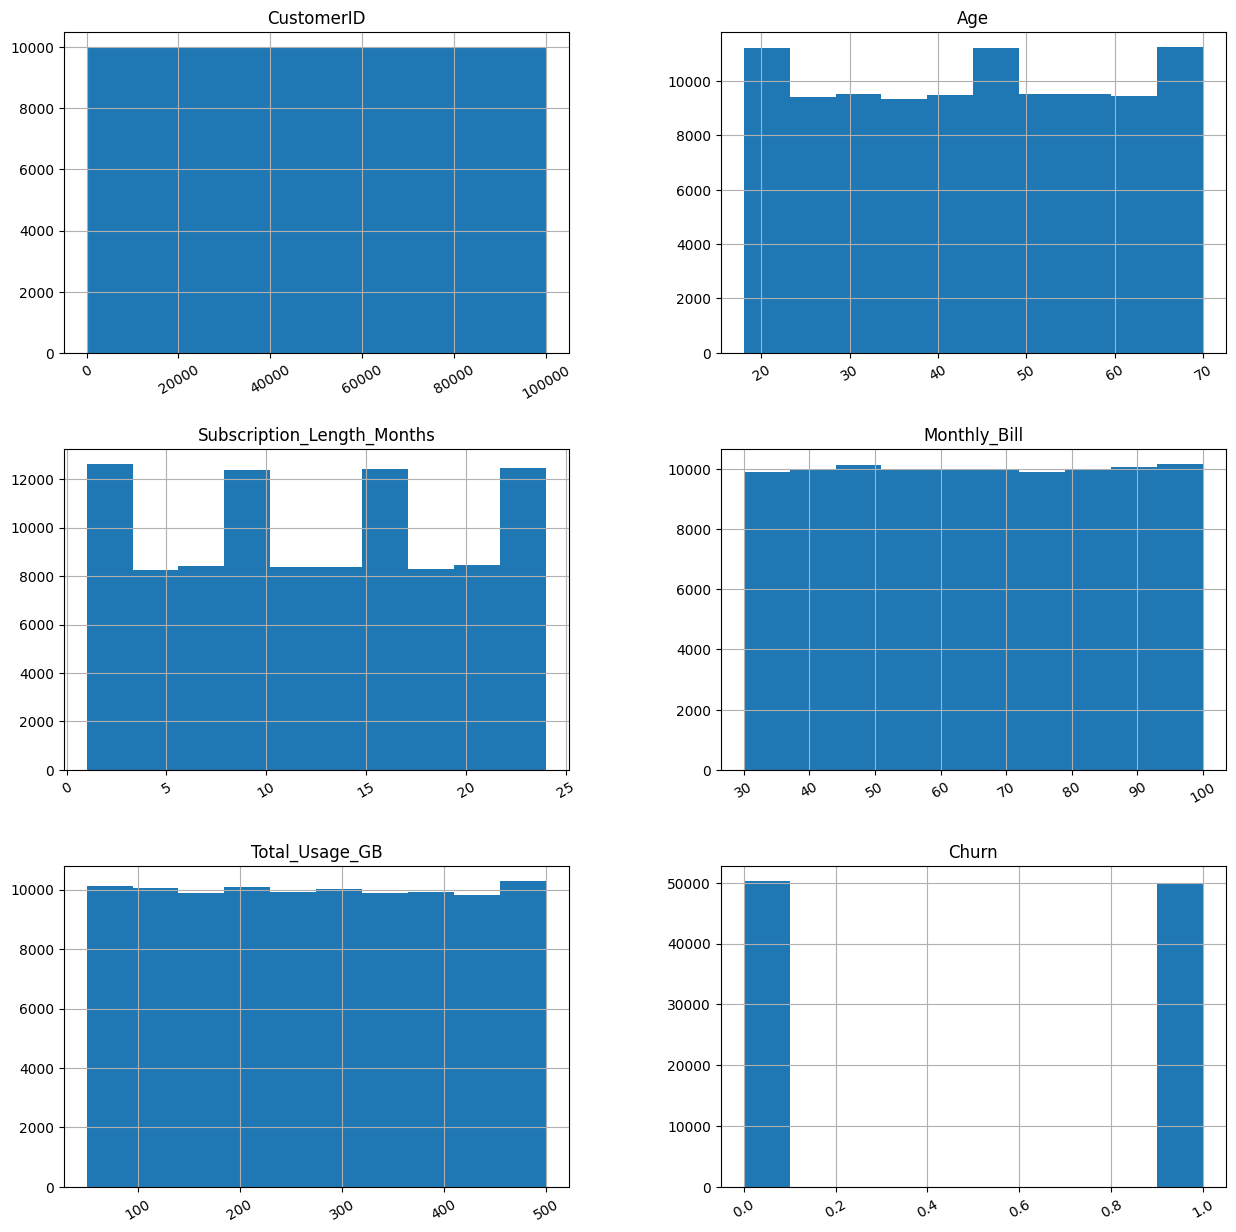

In [ ]:
data_df.hist(figsize=(15,15), xrot=30)

In [ ]:
# Find the gender with the most Subscription_Length_Months
data_df.groupby("Gender")["Subscription_Length_Months"].mean().sort_values(ascending=False)

# Find the age with the most Subscription_Length_Months
data_df.groupby("Age")["Subscription_Length_Months"].mean().sort_values(ascending=False)

# Find the location with the most Total_Usage_GB
data_df.groupby("Location")["Total_Usage_GB"].mean().sort_values(ascending=False)

# Find the location with the least Total_Usage_GB
data_df.groupby("Location")["Total_Usage_GB"].mean().sort_values(ascending=True)

# Find the location with the lowest churn rate
data_df.groupby("Location")["Churn"].mean().sort_values(ascending=True)

# Find the location with the highest churn rate
data_df.groupby("Location")["Churn"].mean().sort_values(ascending=False)


Location
New York       0.503659
Miami          0.503020
Chicago        0.498296
Los Angeles    0.492989
Houston        0.491095
Name: Churn, dtype: float64

In [ ]:
data_df = df
print(df)


       CustomerID   Name  Age  Gender  Location  Subscription_Length_Months  \
0               1      0   63       1         0                          17   
1               2      1   62       0         1                           1   
2               3      2   24       0         0                           5   
3               4      3   36       0         3                           3   
4               5      4   46       0         3                          19   
...           ...    ...  ...     ...       ...                         ...   
99995       99996  99995   33       1         4                          23   
99996       99997  99996   62       0         1                          19   
99997       99998  99997   64       1         2                          17   
99998       99999  99998   51       0         1                          20   
99999      100000  99999   27       0         0                          19   

       Monthly_Bill  Total_Usage_GB  Churn  
0     

In [ ]:
# Finding which gender has more Subscription_Length_Months
gender_subscription = df.groupby('Gender')['Subscription_Length_Months'].mean()

# Finding which age has more Subscription_Length_Months
age_subscription_max = df[df['Subscription_Length_Months'] == df['Subscription_Length_Months'].max()]['Age'].values[0]

# Finding which age has less Subscription_Length_Months
age_subscription_min = df[df['Subscription_Length_Months'] == df['Subscription_Length_Months'].min()]['Age'].values[0]

# Which location has the most Total_Usage_GB
location_max_usage = df[df['Total_Usage_GB'] == df['Total_Usage_GB'].max()]['Location'].values[0]

# Which location has the least Total_Usage_GB
location_min_usage = df[df['Total_Usage_GB'] == df['Total_Usage_GB'].min()]['Location'].values[0]

# From which location we have low churn and more churn
location_churn = df.groupby('Location')['Churn'].value_counts().unstack(fill_value=0)

# Insights
# 1. Gender with more Subscription_Length_Months
#    gender_subscription

# 2. Age with more Subscription_Length_Months
#    age_subscription_max

# 3. Age with less Subscription_Length_Months
#    age_subscription_min

# 4. Location with the most Total_Usage_GB
#    location_max_usage

# 5. Location with the least Total_Usage_GB
#    location_min_usage

# 6. Location-wise churn statistics
#    location_churn

# 7. Average Monthly_Bill
#    average_monthly_bill = df['Monthly_Bill'].mean()

# 8. Overall churn rate
#    churn_rate = df['Churn'].mean()


In [ ]:
print(gender_subscription)
print(age_subscription_max )
print(age_subscription_min)
print(location_max_usage)
print(location_min_usage)
print(location_churn )

Gender
Female    12.487892
Male      12.492327
Name: Subscription_Length_Months, dtype: float64
29
62
Los Angeles
Miami
Churn            0      1
Location                 
Chicago      10013   9945
Houston      10258   9899
Los Angeles  10161   9880
Miami         9955  10076
New York      9834   9979


In [ ]:
data= data_df

data.drop("CustomerID",axis='columns')
data.drop("Name",axis='columns')
print(data.head)

<bound method NDFrame.head of        CustomerID             Name  Age  Gender     Location  \
0               1       Customer_1   63    Male  Los Angeles   
1               2       Customer_2   62  Female     New York   
2               3       Customer_3   24  Female  Los Angeles   
3               4       Customer_4   36  Female        Miami   
4               5       Customer_5   46  Female        Miami   
...           ...              ...  ...     ...          ...   
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                              17         73.36             236      0  
1                               1         48.76        

In [ ]:
df.head()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,Customer_2,62,Female,New York,1,48.76,172,0
2,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,Customer_4,36,Female,Miami,3,97.94,297,1
4,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
df.drop(["CustomerID"], inplace = True, axis = 1)

In [ ]:
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

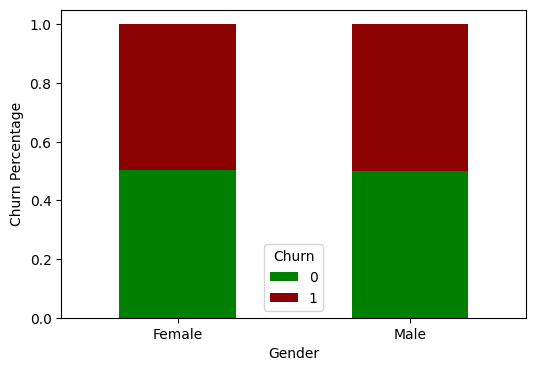

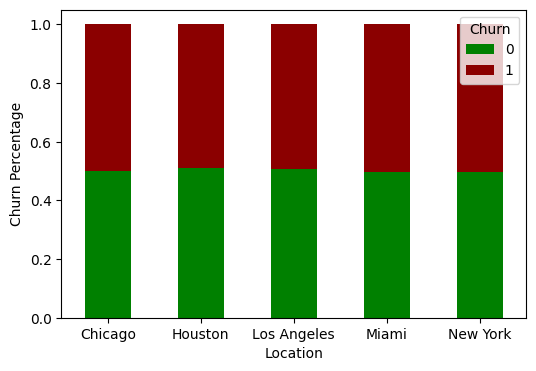

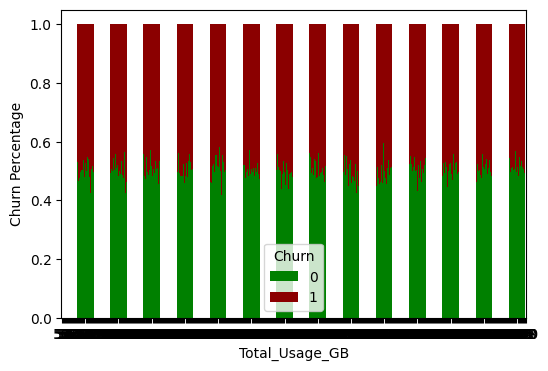

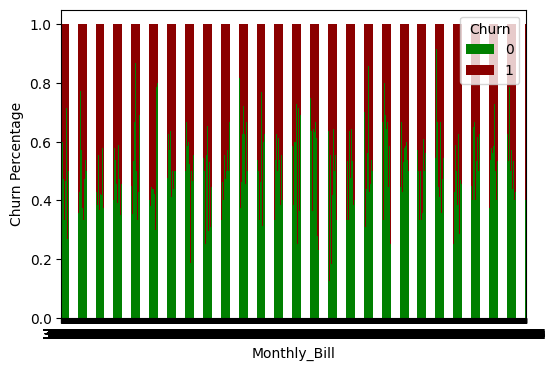

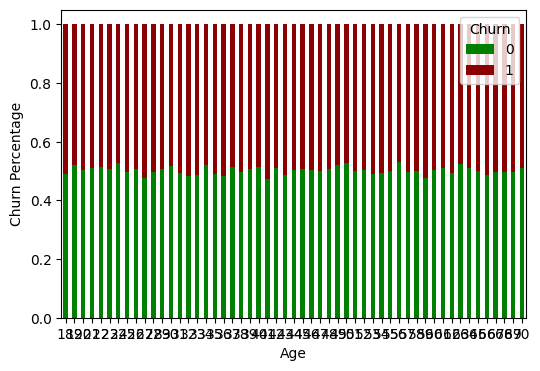

In [ ]:
stacked_plot(df, "Gender", "Churn")
stacked_plot(df, "Location", "Churn")
stacked_plot(df, "Total_Usage_GB", "Churn")
stacked_plot(df, "Monthly_Bill", "Churn")
stacked_plot(df, "Age", "Churn")

In [ ]:
# Find the number of people who are 60 or above in age
number_of_people_60_above = len(df[df["Age"] >= 60])

print("The number of people who are 60 or above in age is", number_of_people_60_above)


The number of people who are 60 or above in age is 20719


In [ ]:
df['Subscription_Length_Months'].describe()

count    100000.000000
mean         12.490100
std           6.926461
min           1.000000
25%           6.000000
50%          12.000000
75%          19.000000
max          24.000000
Name: Subscription_Length_Months, dtype: float64

In [ ]:
df['Subscription_Length_Months'].value_counts().head(10)

20    4303
22    4267
1     4247
16    4229
2     4228
14    4213
7     4211
11    4200
6     4184
5     4171
Name: Subscription_Length_Months, dtype: int64

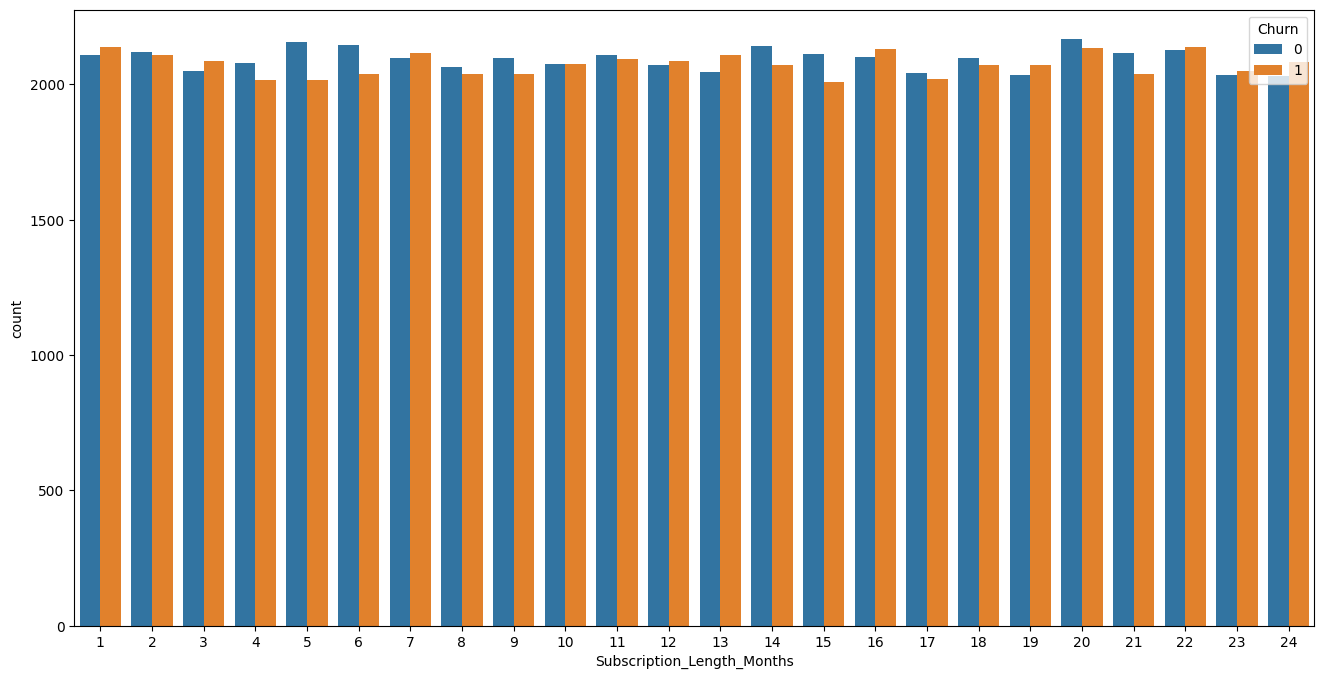

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.countplot(x="Subscription_Length_Months", hue="Churn", data=df)
plt.show()

In [ ]:
#Monthly_Bill
df.Monthly_Bill.describe()

count    100000.000000
mean         65.053197
std          20.230696
min          30.000000
25%          47.540000
50%          65.010000
75%          82.640000
max         100.000000
Name: Monthly_Bill, dtype: float64